In [1]:
from deepface import DeepFace
import cv2
import matplotlib.pyplot as plt
import json
import glob
import pickle
import os
import time
import re

# Single File Example

In [19]:
res = DeepFace.analyze("IMG-9322.png", enforce_detection=False)

Action: race: 100%|██████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00,  6.77it/s]


In [20]:
print(res['emotion'])
res['emotion'].values()

{'angry': 83.49053165260146, 'disgust': 0.18683351758620248, 'fear': 2.455627878345721, 'happy': 0.0372422910374651, 'sad': 5.62648136177548, 'surprise': 0.08391891524271161, 'neutral': 8.119369037113728}


dict_values([83.49053165260146, 0.18683351758620248, 2.455627878345721, 0.0372422910374651, 5.62648136177548, 0.08391891524271161, 8.119369037113728])

Text(0, 0.5, 'Possibility')

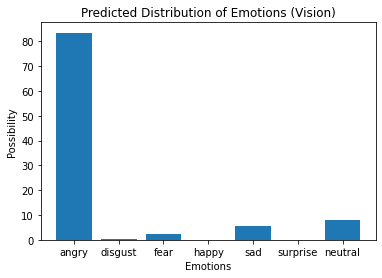

In [21]:
plt.bar(res['emotion'].keys(), res['emotion'].values())
plt.title("Predicted Distribution of Emotions (Vision)")
plt.xlabel("Emotions")
plt.ylabel("Possibility")

Text(0, 0.5, 'Possibility')

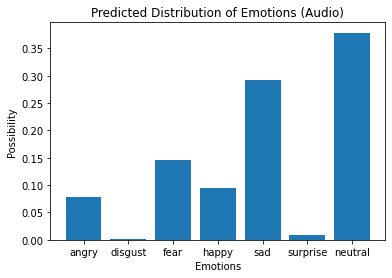

In [22]:
audio = [0.0789, 0.0019, 0.1456, 0.0940, 0.2917, 0.0092, 0.3787]
plt.bar(res['emotion'].keys(), audio)
plt.title("Predicted Distribution of Emotions (Audio)")
plt.xlabel("Emotions")
plt.ylabel("Possibility")

Text(0, 0.5, 'Possibility')

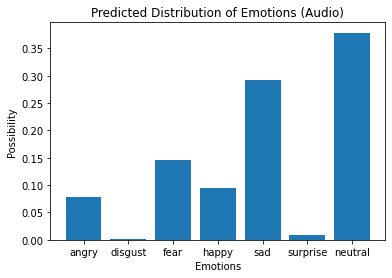

In [23]:
audio = []
plt.bar(['Male', 'Female'], audio)
plt.title("Predicted Distribution of Genders (Audio)")
plt.xlabel("Gender")
plt.ylabel("Possibility")

# Batch Processing

In [3]:
emotion2class = {"angry": 0, "disgust": 1, "fear": 2, "happy": 3, "neutral": 4, "sad": 5, "surprise": 6}
race2class = {"asian": 0, "black": 1, "indian": 2, "latino hispanic": 3, 'middle eastern': 4, 'white': 5}

In [10]:
%%capture
path = r'.\data'
folders= os.listdir(path)
i = -1
j = 1

broken_folder = ['Harry_Connick_Jr.', 'Harry_Shum_Jr.', 'John_Gallagher_Jr.', 'Louis_C.K.', 'Sammy_Davis_Jr.']

counter = 0
start_id = 0
for name in folders: # only choose half people
    counter += 1
    if counter <= start_id: # skip processed folders
        continue
    
    if name in broken_folder:
        print("skip broken_folder")
        continue
    
    dir = path + '\\' +  str(name) + '\\' + '1.6'
    sub_folders = os.listdir(dir)
    i = -i
    if i > 0:
        continue
    
    for hash_tag in sub_folders: # only choose half vedios
        dir = path + '\\' +  str(name) + '\\' + '1.6' + '\\' + str(hash_tag)
        sub_sub_folders = os.listdir(dir)
        j = -j
        if j > 0:
            continue
        
        m = 0
        limit = min(len(sub_sub_folders), 3)
        for sentence in sub_sub_folders:  # only choose up to 3 sentence for each vedio
            dir = path + '\\' +  str(name) + '\\' + '1.6' + '\\' + str(hash_tag) + '\\' + str(sentence)
            sub_sub_sub_files = os.listdir(dir)
            sentence_id = hash_tag + '-' + sentence.zfill(5)
            m += 1
            if m > limit:
                continue
                
            n = 0
            temp_res = []
            for file in sub_sub_sub_files:
                n = n + 1
                if n % 3 != 0:
                    continue
                
                file_path = dir + "\\" + file
                res = DeepFace.analyze(file_path, enforce_detection=False)
                temp_res.append(res)
                
            # after getting all predicted results for a sentence, give the most reliable result
            length = len(temp_res)
            # processing emotions
            emotions = {}
            emotion_keys = temp_res[0]['emotion'].keys()
            for key in emotion_keys:
                val = 0
                for i in range(length):
                    val += temp_res[i]['emotion'][key]
                val /= length
                emotions[emotion2class[key]] = val

            # processing age
            age = 0
            for i in range(length):
                age += temp_res[i]['age']
            age /= length
            
            # processing gender
            gender = {}
            man = 0      # counter
            woman = 0
            for i in range(length):
                if temp_res[i]['gender'] == 'Man':
                    man += 1
                else:
                    woman += 1
            gender[0] = man / (man + woman)
            gender[1] = woman / (man + woman)
            
            # processing race
            race = {}
            race_keys = temp_res[0]['race'].keys()
            for key in race_keys:
                val = 0
                for i in range(length):
                    val += temp_res[i]['race'][key]
                val /= length
                race[race2class[key]] = val
            
            # output
            content = {}
            content["emotion"] = emotions
            content["age"] = age
            content["gender"] = gender
            content["race"] = race
            print(content)
            output_file_path = './json/' + sentence_id + '.json'
            with open(output_file_path, 'w') as f:
                json.dump(content, f)
            print(sentence_id + " has been processed")

In [ ]:
# still need the max for test:
json_path = '.\json'
json_files = os.listdir(json_path)
hashtag_dict = {}
json_dict = {}
for file in json_files:
    json_path = 
    with open(output_file_path, 'w') as f:
        json.dump(content, f)